# Natural Language Project

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## The Data

In [76]:
yelp = pd.read_csv("yelp.csv")

In [77]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [78]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [79]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Here I am creating a new column based on the length of the review**

In [80]:
yelp['text length'] = yelp['text'].apply(len)
yelp.describe()

,stars,cool,useful,funny,text length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [81]:
yelp.groupby("stars").describe()['text length']

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,749.0,826.515354,742.929304,11.0,315.0,600.0,1075.00,4618.0
2,927.0,842.256742,704.079491,7.0,365.5,656.0,1105.00,4972.0
3,1461.0,758.498289,627.594294,1.0,342.0,599.0,975.00,4975.0
4,3526.0,712.923142,600.158476,2.0,307.0,551.5,945.75,4997.0
5,3337.0,624.999101,558.578229,6.0,243.0,471.0,826.00,4986.0


# Exploratory Data Analysis (EDA)

I will use matplotlib and seaborn to create a handful of data visualizations. These will be used to gain a better understanding of any patterns which exist in the data, as well as the behavior of the data overall, in order to model the data more efficiently. 

Okay, I really really don't like the iterated while loops below, I think they are super ugly. But apparently for loops won't reinitialize the internal reference once the loop is finished, and I'm not certain how to work around that. So here is my ugly fix.

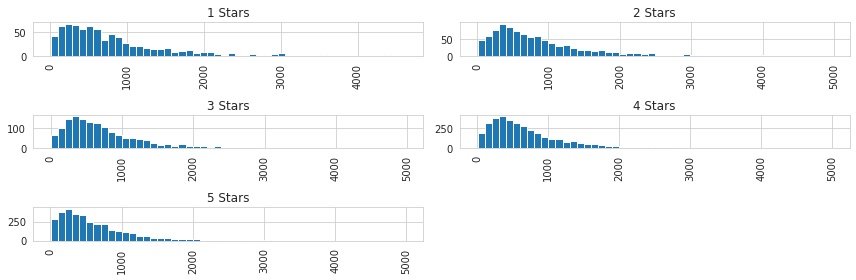

In [82]:
hist = yelp.hist(column = "text length", by = "stars", bins = 50, figsize = (12,4))
plt.tight_layout()
k = 1
i = 0
while i < 3:
    j = 0
    while j < 2:
        hist[i][j].set_title("%d Stars" % k)
        k += 1
        j += 1
    i += 1

The distribution with the left-most ("shortest review length") peak is the 5 star reviews, which we can see both in the histograms above, and the descriptives above that. The two lowest star reviews have the greatest spread, with 5 star reviews also being the most compact group. All groupings tend to have the majority of their reviews with less than 1000 charecters.

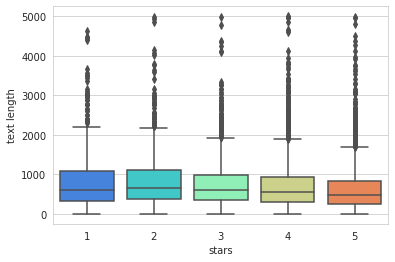

In [83]:
sns.boxplot("stars", "text length", data = yelp, palette = "rainbow")

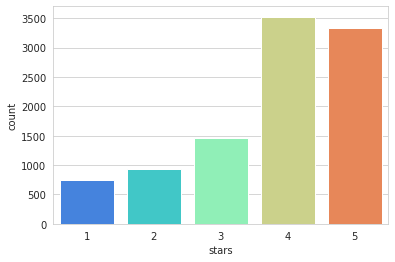

In [84]:
sns.countplot(yelp['stars'], palette = "rainbow")

The majority of the reviews left were 4 star reviews, with 5 star reviews being the next most frequent type of review left.

In [85]:
mean_yelp = yelp.groupby("stars").mean()
mean_yelp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


The above shows the average metadata for the reviews themselves. The 4 and 5 star reviews are most frequently marked as being cool, while the 1 and 2 star reviews are most frequently voted as useful and as funny. Somewhat intersetingly, the 3 star reviews are found at the center of all ratings, and text length.

In [86]:
mean_yelp.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


The above shows the correlation for the average rating scores. The majority of these correlations are notably high, especially that of Cool/Funny. As such, if a review (of any star rank) is marked as cool, it is notably less likely to be marked as funny or useful, and it is most likely a shorter review. If it is marked as useful, it is somewhat more likely to be  longer review, and notably more likely to be rated as funny. If a review is marked as funny, it is also likely to be a longer review.

The below heatmap provides a visual representation of the above correlation table.

Text(0.5, 1, 'Correlation of Average Review Ratings')

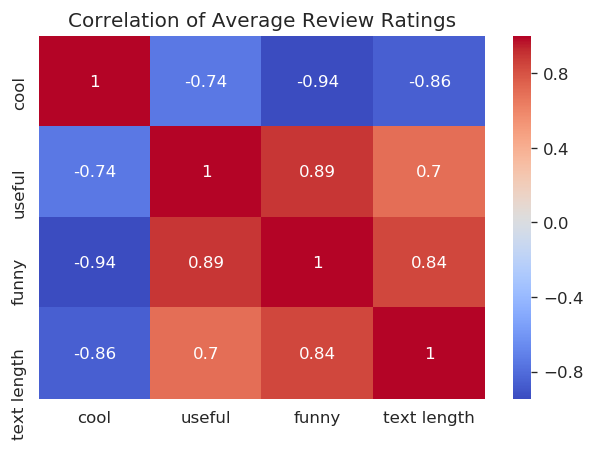

In [87]:
plt.figure(dpi=120)
sns.heatmap(mean_yelp.corr(), cmap = "coolwarm", annot = True)
plt.title('Correlation of Average Review Ratings')

## NLP Classification Task

My goal is to classify reviews which are either 1 or 5 stars, so below I am creating a dataframe which contains only these reviews.

In [88]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [89]:
X = yelp_class['text']
y = yelp_class['stars']

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
countV = CountVectorizer()

In [91]:
X = countV.fit_transform(X)

## Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training the Model

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [95]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluation

In [96]:
predicts = nb.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
pd.crosstab(y_test, predicts, margins = True)

col_0,1,5,All
stars,,,
1,159,69,228
5,22,976,998
All,181,1045,1226


In [102]:
pd.crosstab(y_test, predicts, margins = True, normalize = True)

col_0,1,5,All
stars,,,
1,0.129690,0.056281,0.185971
5,0.017945,0.796085,0.814029
All,0.147635,0.852365,1.000000


In [99]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Although the model has nice precision and recall for the 5 star reviews, it is not as good at wither of these for the 1 star reviews. I can see from the crosstab above that we are incorrectly assigning about 6% of the reviews to class "5 star" when they are infact 1 star reviews.

# Using Text Processing

Now I'll try some additional text processing on the data, to see if it improves the model at all. Originally I was using naive-bayes Multinomial for the model, but I found that, when combined with the Tfidf in the pipeline, all observations were being predicted as class 5. As such, I've swited to Adaboost, after trying various other ensemble methods. Adaboost preformed the best overall, when running purely with the default parameters. 

## AdaBoost Model

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import AdaBoostClassifier

In [128]:
from sklearn.pipeline import Pipeline

Here I'm creating a pipeline to streamlline the preprocessing for the second model.

In [234]:
pipe = Pipeline([
    ("bow", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ('ada', AdaBoostClassifier(learning_rate = 1.5, n_estimators = 70))
])

In [235]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [236]:
y_train.value_counts()

5    2339
1     521
Name: stars, dtype: int64

In [237]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.5, n_estimators=70,
    

### Predictions and Evaluation

In [238]:
predicts = pipe.predict(X_test)

In [257]:
pd.crosstab(y_test, predicts)

col_0,1,5
stars,,
1,167,61
5,48,950


In [258]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           1       0.78      0.73      0.75       228
           5       0.94      0.95      0.95       998

    accuracy                           0.91      1226
   macro avg       0.86      0.84      0.85      1226
weighted avg       0.91      0.91      0.91      1226



The original model, without preprocessing, preformed slightly better overall, although the newer model has slightly better recall for the 1 star reviews.